**Titanic - Machine Learning from Disaster**

<div style="text-align: justify"> 
Source: https://www.kaggle.com/code/preejababu/titanic-data-science-solutions
</div>

***

# Import Packages

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pathlib

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
# increase the display domain of dataframes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Load Data

In [3]:
path_code = pathlib.Path().resolve()
# list((path_code).iterdir())
path_data = path_code / 'Data'

In [4]:
##### load titanic train data #####
df_train = pd.read_csv(path_data / 'train.csv')

print(df_train.shape)
df_train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
##### load titanic test data #####
df_test = pd.read_csv(path_data / 'test.csv')

print(df_test.shape)
df_test.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
combine = [df_train, df_test]

# Data Preprocessing

## Exploratory Data Analysis 

In [7]:
# df_train.dtypes

In [8]:
# df_train.isna().sum()

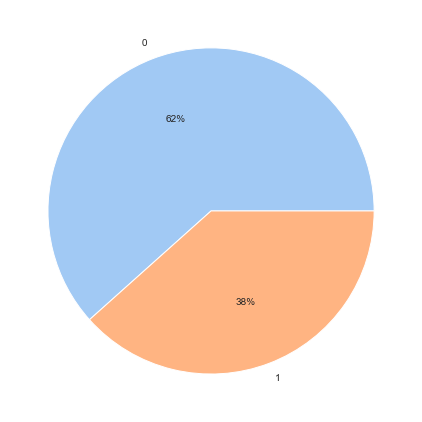

In [9]:
##### dependent factor: did the passenger survive or die? #####
# df_train.Survived.value_counts()

plt.figure(figsize=(7.5, 7.5))
colors = sns.color_palette('pastel')
plt.pie(x=list(df_train.Survived.value_counts().unique()), labels=list(df_train.Survived.unique()), 
        colors = colors, autopct='%.0f%%')
plt.show()

In [10]:
##### independent factors #####

In [11]:
##### catergorical factors #####
df_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [12]:
##### Name --> Title #####
for dataset in combine:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(df_train.Title, df_train.Survived) 

Survived,0,1
Title,,
Capt,1,0
Col,1,1
Countess,0,1
Don,1,0
Dr,4,3
Jonkheer,1,0
Lady,0,1
Major,1,1
Master,17,23


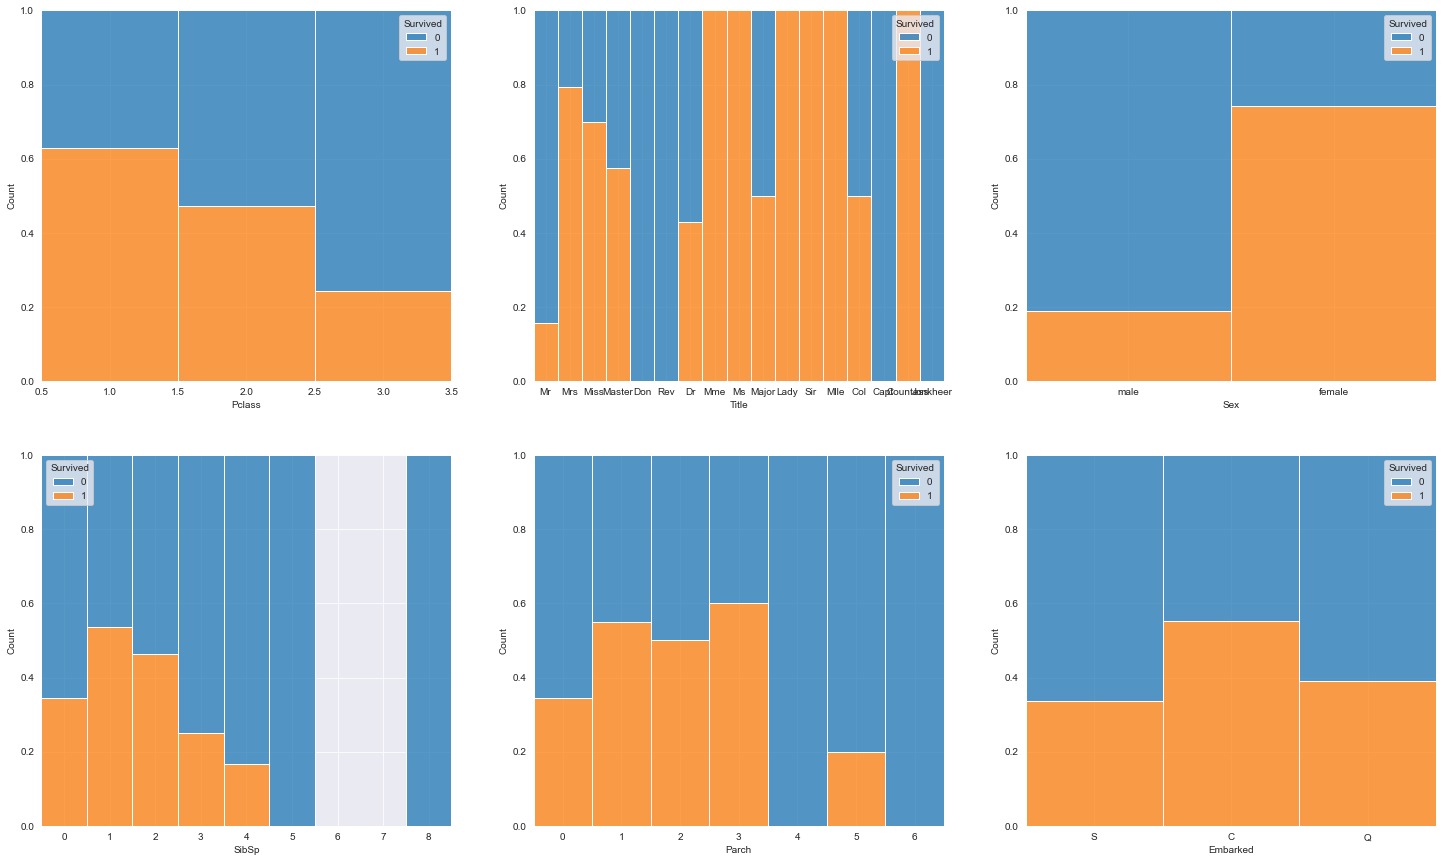

In [13]:
##### plot categorical factors #####
fig, axes = plt.subplots(2, 3, figsize=(25, 15))

categorical_factor = ['Pclass', 'Title', 'Sex', 'SibSp', 'Parch', 'Embarked']
for i, ax in zip(range(len(axes)), axes):
    for j, axis in zip(range(0, 3), ax):
        if i > 0: j += 3            

        sns.histplot(ax=axis, data=df_train, x=categorical_factor[j], hue='Survived',
                    multiple='fill', discrete=True)

In [14]:
##### numerical factors #####
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


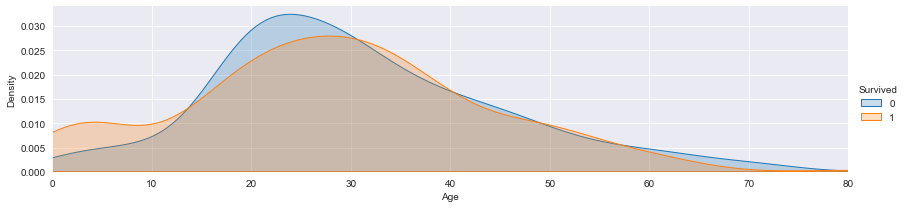

In [15]:
##### Age #####
facet = sns.FacetGrid(df_train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, df_train['Age'].max()))
facet.add_legend() 
plt.show()

# children less than 10 mostly survived 

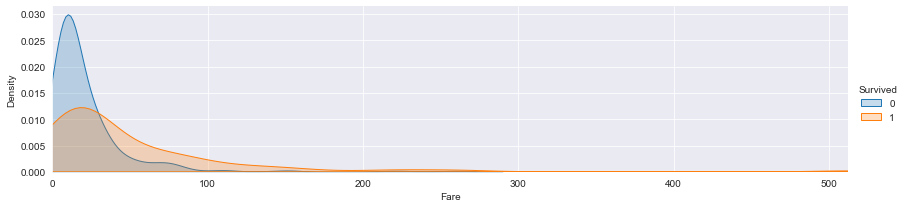

In [16]:
##### Fare #####
facet = sns.FacetGrid(df_train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, df_train['Fare'].max()))
facet.add_legend()
plt.show()

# very few passengers paid very high fare --> most survived

In [17]:
##### multivariate plot #####

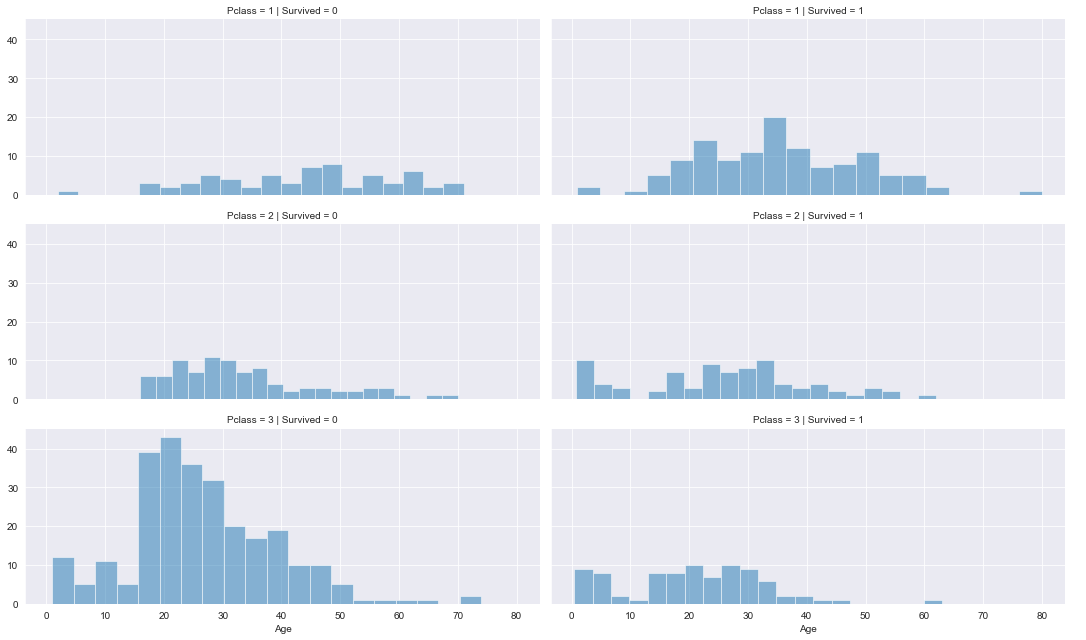

In [18]:
##### Pclass vs Age | Survived #####
grid = sns.FacetGrid(df_train, col='Survived', row='Pclass', aspect=2.5)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

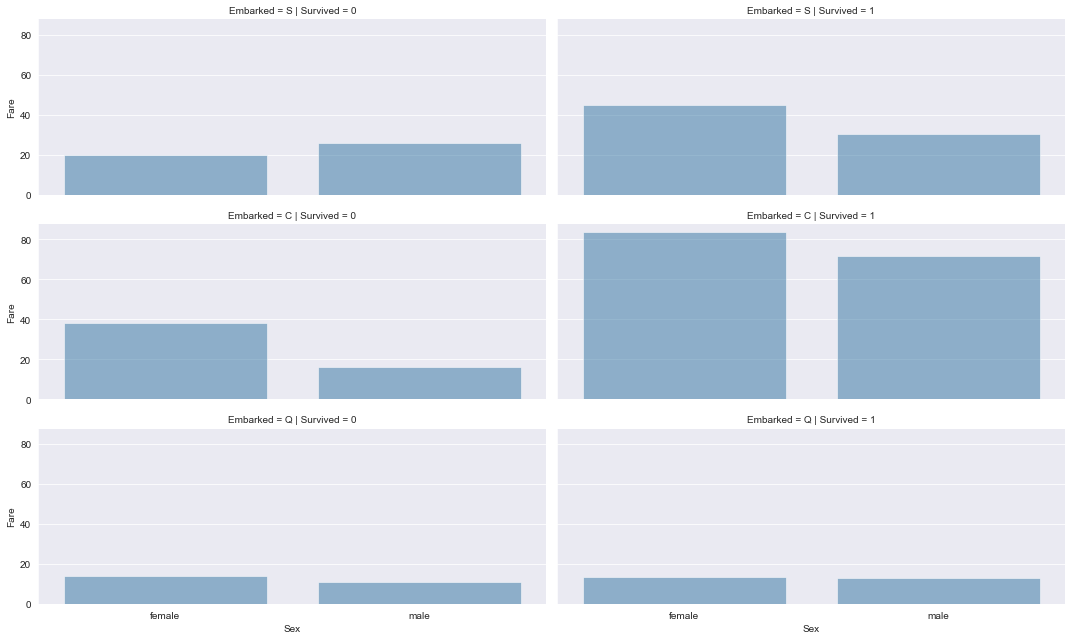

In [19]:
##### Embarked vs Sex | Survived #####
grid = sns.FacetGrid(df_train, row='Embarked', col='Survived', aspect=2.5)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, errorbar=None)
grid.add_legend()

## Feature Engineering

In [20]:
##### Embarked #####
for dataset in combine:
    dataset['Embarked'] =  dataset['Embarked'].fillna('S')

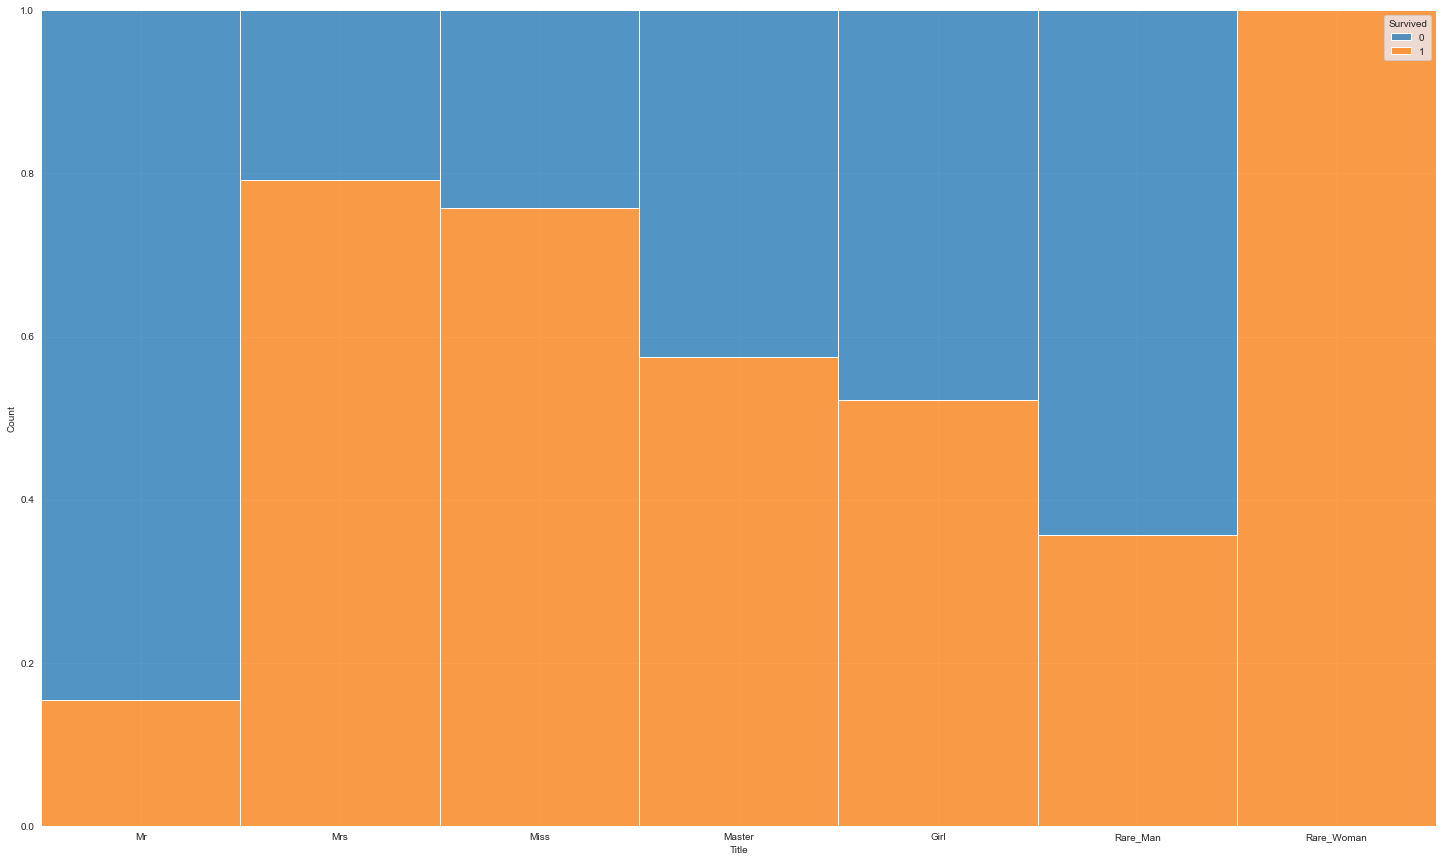

In [21]:
##### Title #####
# pd.crosstab(df_train.Title, df_train.Sex) # all title belongs to one kind of gender except doctor
# df_train[(df_train.Title=='Dr') & (df_train.Sex=='female')] # the PassengerId of the female 'Dr' is '797'

revised_title = {'Capt':'Rare_Man', 'Col':'Rare_Man', 'Don':'Rare_Man', 'Dona':'Rare_Woman', 'Dr':'Rare_Man', 'Jonkheer':'Rare_Man', 
                 'Lady':'Rare_Woman','Major':'Rare_Man', 'Master':'Master', 'Miss':'Miss', 'Mlle':'Rare_Woman', 'Mme':'Rare_Woman',
                 'Mr':'Mr', 'Mrs':'Mrs', 'Ms':'Rare_Woman', 'Rev':'Mr', 'Sir':'Rare_Man', 'Countess':'Rare_Woman'}

for dataset in combine:
    dataset['Title'] = dataset['Title'].map(revised_title)

df_train.loc[df_train.PassengerId==797, 'Title'] = 'Rare_Woman' 

# df_train[['Title', 'Age']].groupby(['Title']).agg({'Age': ['mean', 'min', 'max']})

# 'Master' mainly stands for little boy, but we also want to find little girl. Because children tend to have higher survival rate.
# for the 'Miss' with a Age record, we can simply determine whether a 'Miss' is a little girl by her age.
# for the 'Miss' with no Age record, we use (Parch != 0). Since if it's a little girl, she was very likely to be accompanied by parents.

def girl(df):
    if (not (np.isnan(df.Age))) & (df.Title == 'Miss') & (df.Age <= 14):
        return 'Girl'
    elif (np.isnan(df.Age)) & (df.Title == 'Miss') & (df.Parch != 0):
        return 'Girl'
    else:
        return df.Title

for dataset in combine:
    dataset['Title'] = dataset.apply(girl, axis=1)

title = ['Mr', 'Miss', 'Mrs', 'Master', 'Girl', 'Rare_Man', 'Rare_Woman']
for dataset in combine:
    for i in title:
        dataset.loc[(np.isnan(dataset.Age)) & (dataset.Title==i), 'Age'] = dataset.loc[dataset.Title == i, 'Age'].median()

# df_train.Title.isna().sum()

plt.figure(figsize=(25, 15))
sns.histplot(data=df_train, x='Title', hue='Survived', multiple='fill', discrete=True)
# df_train.groupby(['Title'])[['Age', 'Title']].mean().plot(kind='bar')
plt.show()

In [22]:
##### Age #####
df_train['FareCut'] = pd.NaT
df_test['FareCut'] = pd.NaT

for dataset in combine:
    dataset.loc[(dataset.Age <= 15, 'AgeCut')] = 1
    dataset.loc[(dataset.Age > 15) & (dataset.Age <= 30), 'AgeCut'] = 2
    dataset.loc[(dataset.Age > 30) & (dataset.Age <= 50), 'AgeCut'] = 3
    dataset.loc[(dataset.Age > 50) & (dataset.Age <= 65), 'AgeCut'] = 4
    dataset.loc[(dataset.Age > 65, 'AgeCut')] = 5

# df_train.AgeCut.value_counts().sort_index()

<AxesSubplot: xlabel='FareCut'>

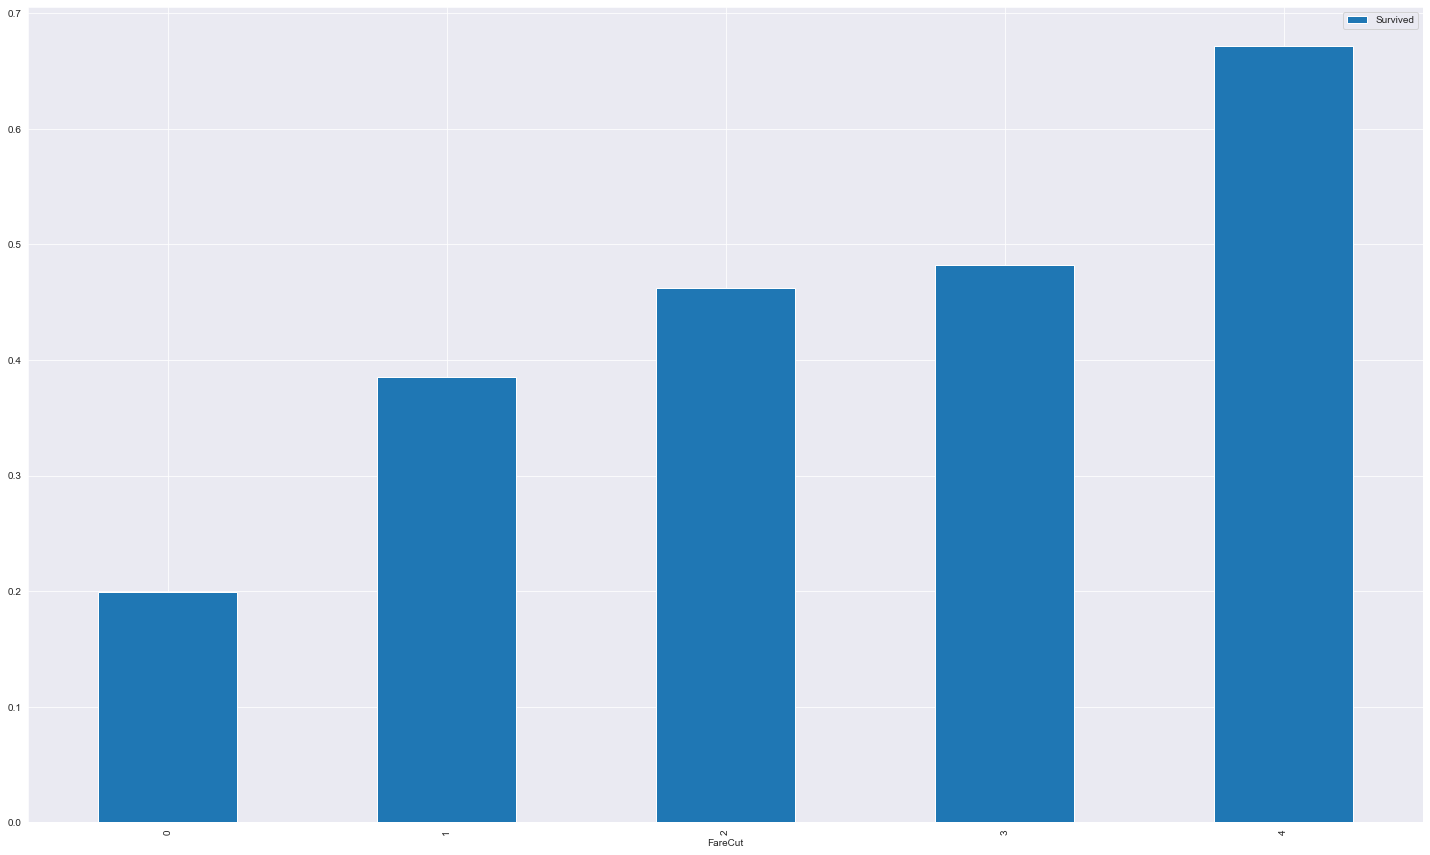

In [23]:
##### Fare #####
# df_test.Fare.isna().sum()
df_test['Fare'].fillna(df_test['Fare'].dropna().median(), inplace=True)

df_train['FareCut'] = pd.NaT
df_test['FareCut'] = pd.NaT

for dataset in combine:
    dataset.loc[(dataset.Fare <= 10, 'FareCut')] = 0
    dataset.loc[(dataset.Fare > 10) & (dataset.Fare <= 15), 'FareCut'] = 1
    dataset.loc[(dataset.Fare > 15) & (dataset.Fare <= 30), 'FareCut'] = 2
    dataset.loc[(dataset.Fare > 30) & (dataset.Fare <= 60), 'FareCut'] = 3
    dataset.loc[(dataset.Fare > 60, 'FareCut')] = 4
    
df_train[['FareCut','Survived']].groupby(['FareCut']).mean().plot.bar(figsize=(25, 15))

In [24]:
# df_train.head()
for dataset in combine:
    dataset.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)
    dataset['AgeCut'] = dataset['AgeCut'].astype(int)

In [25]:
##### one-hot encoding #####
df_names = ['df_train', 'df_test']
dict_dataframe = {}

for i in range(len(combine)):
    dict_dataframe[df_names[i]] = pd.get_dummies(data=combine[i], 
                                                 columns=['Pclass', 'Sex', 'Embarked', 'Title', 'FareCut', 'AgeCut'], 
                                                 drop_first=True)

df_train = dict_dataframe['df_train']
df_test = dict_dataframe['df_test']
combine = [df_train, df_test]

In [26]:
##### Cabin #####
for dataset in combine:
    dataset['Cabin'] = dataset['Cabin'].str[:1]
    
# df_train.Cabin.value_counts()
    
cabin_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'T': 7}
for dataset in combine:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [27]:
##### imputation #####
df_names = ['df_train', 'df_test']
dict_dataframe = {}

knn_imputer = KNNImputer(n_neighbors=3)

for i in range(len(combine)):
    dict_dataframe[df_names[i]] = knn_imputer.fit_transform(combine[i])

df_train = pd.DataFrame(dict_dataframe['df_train'], columns=df_train.columns)
df_test = pd.DataFrame(dict_dataframe['df_test'], columns=df_test.columns)
combine = [df_train, df_test]

df_train.Cabin = round(df_train.Cabin)
df_test.Cabin = round(df_test.Cabin)

In [28]:
df_train.head()

,Survived,Age,SibSp,Parch,Fare,Cabin,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare_Man,Title_Rare_Woman,FareCut_1,FareCut_2,FareCut_3,FareCut_4,AgeCut_2,AgeCut_3,AgeCut_4,AgeCut_5
0,0.0,22.0,1.0,0.0,7.2500,5.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,38.0,1.0,0.0,71.2833,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,26.0,0.0,0.0,7.9250,5.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,35.0,1.0,0.0,53.1000,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,35.0,0.0,0.0,8.0500,3.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [29]:
X_train = df_train.drop('Survived', axis=1)
y_train = df_train['Survived']
X_test = df_test

X_train.shape, y_train.shape, X_test.shape

((891, 24), (891,), (418, 24))

In [30]:
##### scale data #####
scaler=StandardScaler()

X_train_SCALED = scaler.fit(X_train).transform(X_train)
X_test_SCALED = scaler.fit(X_test).transform(X_test)

# Modeling

In [31]:
##### logistic regression #####
logreg = LogisticRegression()
logreg.fit(X_train_SCALED, y_train)
y_pred = logreg.predict(X_test_SCALED)

acc_log = round(logreg.score(X_train_SCALED, y_train) * 100, 2)
acc_log

83.28

In [32]:
##### support vector machine #####
svc = SVC()
svc.fit(X_train_SCALED, y_train)
y_pred = svc.predict(X_test_SCALED)

acc_svc = round(svc.score(X_train_SCALED, y_train) * 100, 2)
acc_svc

85.63

In [33]:
##### K-nearest neighbor #####
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_SCALED, y_train)
y_pred = knn.predict(X_test_SCALED)

acc_knn = round(knn.score(X_train_SCALED, y_train) * 100, 2)
acc_knn

87.99

In [34]:
##### gaussian naive bayes #####
gaussian = GaussianNB()
gaussian.fit(X_train_SCALED, y_train)
y_pred = gaussian.predict(X_test_SCALED)

acc_gaussian = round(gaussian.score(X_train_SCALED, y_train) * 100, 2)
acc_gaussian

74.19

In [35]:
##### perceptron #####
perceptron = Perceptron()
perceptron.fit(X_train_SCALED, y_train)
y_pred = perceptron.predict(X_test_SCALED)

acc_perceptron = round(perceptron.score(X_train_SCALED, y_train) * 100, 2)
acc_perceptron

62.29

In [36]:
##### Linear SVC #####
linear_svc = LinearSVC()
linear_svc.fit(X_train_SCALED, y_train)
y_pred = linear_svc.predict(X_test_SCALED)

acc_linear_svc = round(linear_svc.score(X_train_SCALED, y_train) * 100, 2)
acc_linear_svc

83.39

In [37]:
##### stochastic gradient descent #####
sgd = SGDClassifier()
sgd.fit(X_train_SCALED, y_train)
y_pred = sgd.predict(X_test_SCALED)

acc_sgd = round(sgd.score(X_train_SCALED, y_train) * 100, 2)
acc_sgd

81.93

In [38]:
##### decision Tree #####
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_SCALED, y_train)
y_pred = decision_tree.predict(X_test_SCALED)

acc_decision_tree = round(decision_tree.score(X_train_SCALED, y_train) * 100, 2)
acc_decision_tree

98.54

In [39]:
##### random Forest #####
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train_SCALED, y_train)
y_pred = random_forest.predict(X_test_SCALED)

acc_random_forest = round(random_forest.score(X_train_SCALED, y_train) * 100, 2)
acc_random_forest

98.54

In [40]:
##### model evaluation #####
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_perceptron, acc_sgd, acc_linear_svc, acc_decision_tree]})

models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,98.54
8,Decision Tree,98.54
1,KNN,87.99
0,Support Vector Machines,85.63
7,Linear SVC,83.39
2,Logistic Regression,83.28
6,Stochastic Gradient Decent,81.93
4,Naive Bayes,74.19
5,Perceptron,62.29


In [41]:
models.Score.mean()

83.97555555555556